# Laboratory work 4: least squares and interpolation

---

## Work objective:

Given the population of the USA from 1910 to 2000 every 10 years:

1) approximate it using the method of least squares;
2) build Newton's divided differences interpolation polynomial;
3) build a spline.

Then extrapolate the data to the year 2010 and compare the result with the actual data.

## Population

|Year | The number of citizens|
|:---:|:---------------------:|
|1910 | 92 228 496            |
|1920 |106 021 537            |
|1930 |123 202 624            |
|1940 |132 164 569            |
|1950 |151 325 798            |
|1960 |179 323 175            |
|1970 |203 211 926            |
|1980 |226 545 805            |
|1990 |248 709 873            |
|2000 |281 421 906            |
|2010 |308 745 538            |

---

## The method of least squares

In [87]:
import numpy as np
from matplotlib import pyplot as plt

def compute_least_squares_matrix(x, deg):

    arr = np.zeros(2 * deg + 1)

    arr[0] = len(x)
    for i in range(1, 2 * deg + 1):
        for k in range(len(x)):
            arr[i] += pow(x[k], i)

    A = np.empty([deg + 1, deg + 1])

    for i in range(deg + 1):
        for j in range(deg + 1):
            A[i, j] = arr[i + j]

    return A

def compute_free_coeffs_column(x, y, deg):

    b = np.zeros(deg + 1)

    b[0] = np.sum(y)
    for i in range(1, deg + 1):
        for k in range(len(x)):
            b[i] += pow(x[k], i) * y[k]

    return b

def least_squares_coeffs(x, y, deg):

    if len(x) != len(y):
        raise RuntimeError("Input arrays must be of the same size")
    elif len(x) < deg + 1:
        raise RuntimeError(f"Not enough data to be approximated by polynomial of degree {deg}")

    A = compute_least_squares_matrix(x, deg)
    b = compute_free_coeffs_column(x, y, deg)

    return np.linalg.inv(A) @ b

def polynomial(coeffs, x):
    return sum(coeffs[i] * (x**i) for i in range(len(coeffs)))

def least_squares_polynomial(x, y, deg):
    return polynomial(least_squares_coeffs(x, y, deg), x)

## Input data

In [88]:
years = np.arange(1910, 2010, 10)
souls = np.array([92228496,
                  106021537,
                  123202624,
                  132164569,
                  151325798,
                  179323175,
                  203211926,
                  226545805,
                  248709873,
                  281421906])

Let's start by choosing the degree of a polynomial to approximate given data.

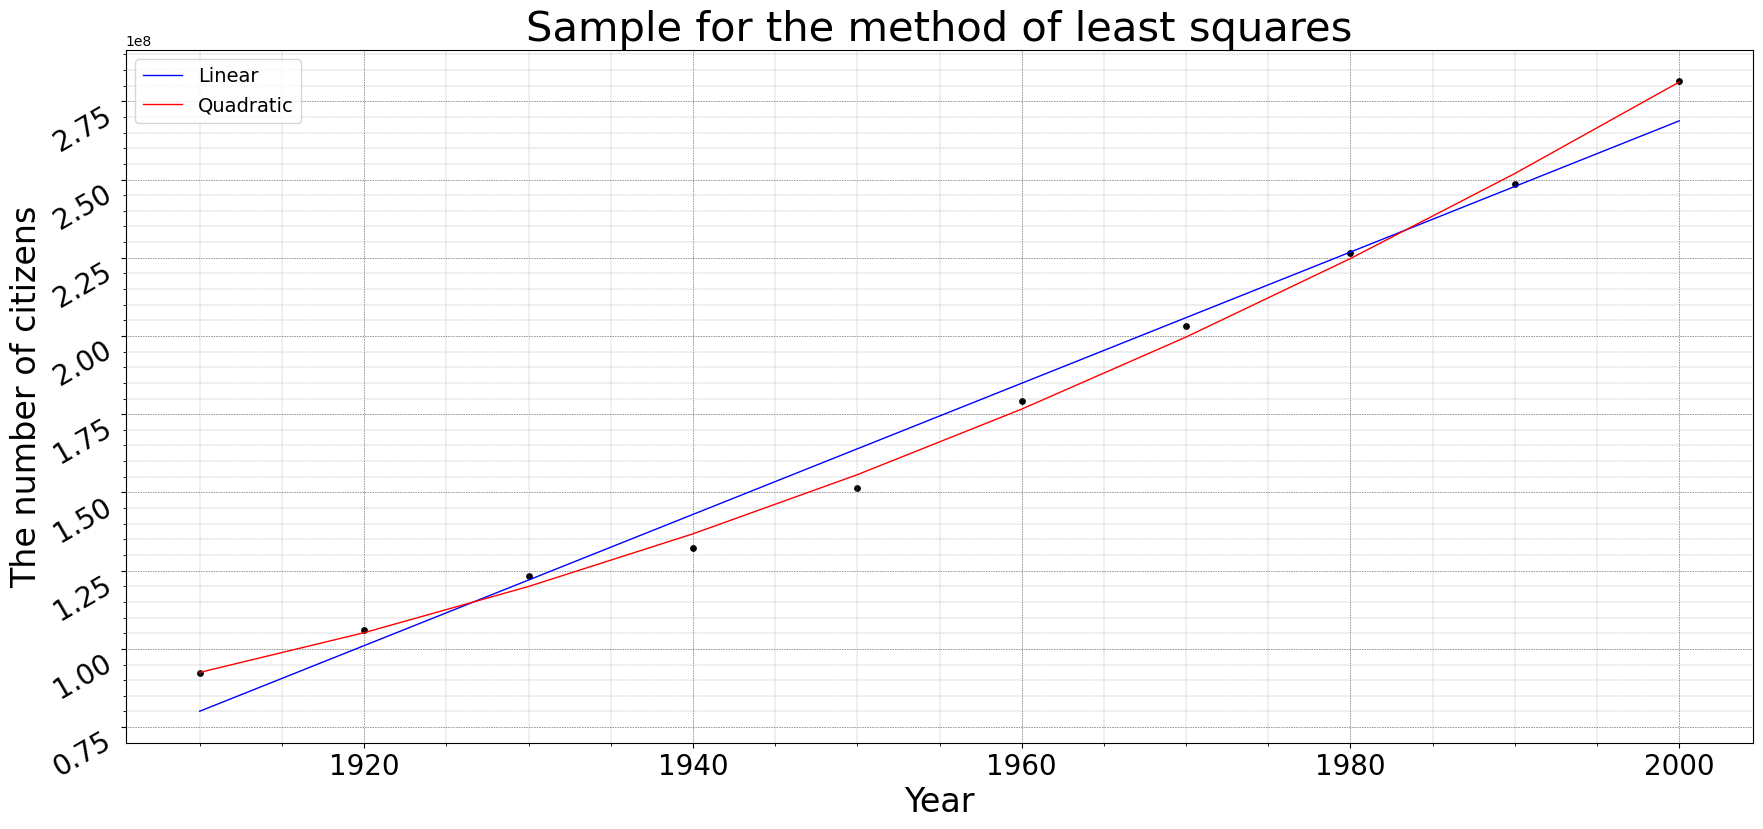

In [89]:
plt.figure(figsize = (21, 9), dpi = 100)
plt.title("Sample for the method of least squares", fontsize = 30)

plt.xlabel("Year", fontsize = 24)
plt.xticks(fontsize =  20, ha = "center", va = "top")

plt.ylabel("The number of citizens", fontsize = 24)
plt.yticks(fontsize = 20, rotation = 30, ha = "right", va = "top")

plt.scatter(years, souls, s = 15, color = "black")

linear_polynomial = least_squares_polynomial(years, souls, 1)
plt.plot(years, linear_polynomial, color='blue', linewidth = 1, label = "Linear")

quadratic_polynomial = least_squares_polynomial(years, souls, 2)
plt.plot(years, quadratic_polynomial, color='red', linewidth = 1, label = "Quadratic")

plt.legend(loc = "best", fontsize = 14)

plt.grid (color = "black", linewidth = 0.45, linestyle = "dotted")
plt.minorticks_on()
plt.grid (which = "minor", color = "grey", linewidth = 0.25, linestyle = "dashed")

plt.show()

We see that a polynomial of degree 2 approximates the data better than the one of the first degree.